In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from math import e
from scipy.optimize import curve_fit
import plotly.graph_objs as go
from plotly.offline import plot

In [2]:
all_df = pd.read_csv('data.csv')

In [3]:
all_df.shape

(9678, 7)

In [4]:
# df = pd.read_csv('processed_data_2021-07-27.csv')

In [5]:
all_df['Timestamp'] = pd.to_datetime(all_df['Timestamp'])

<AxesSubplot:xlabel='Timestamp', ylabel='SG'>

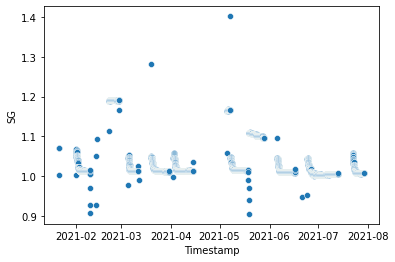

In [6]:
sns.scatterplot(x=all_df['Timestamp'], y=all_df['SG'])

In [49]:
def make_allplot(df):
    data = []
    data.append(go.Scatter({
        'x':df['Timestamp'],
        'y':df['SG'],
        'mode':'markers'
    }))
    layout = go.Layout({
        'title':'All Gravity Data -- spot the beers',
        'xaxis':{'title':'Time'},
        'yaxis':{'title':'Specific Gravity'}
    })
    plot(go.Figure(data,layout), filename='plots/alldata.html')

In [20]:
make_allplot(all_df)

In [30]:
beer_names = [
    'first',
    'second',
    'third',
    'fourth',
    'fifth',
    'sixth',
    'seventh',
    'eighth'
]

In [31]:
start_datetimes = [
    '2021-01-31 17:40:00',
    '2021-03-05 06:02:00',
    '2021-03-19 09:40:00',
    '2021-04-02 08:57:00',
    '2021-05-07 17:23:00',
    '2021-06-05 17:17:00',
    '2021-06-24 06:28:00',
    '2021-07-22 16:38:00'
]

In [32]:
end_datetimes = [
    '2021-02-06 07:23:00',
    '2021-03-09 23:38:00',
    '2021-03-25 00:00:00',
    '2021-04-08 00:00:00',
    '2021-05-14 00:00:00',
    '2021-06-12 00:00:00',
    '2021-07-02 00:00:00',
    '2021-07-29 11:00:00'
]

In [33]:
beer_table = pd.DataFrame({
    'beer_name':beer_names,
    'start_datetime':start_datetimes,
    'end_datetime':end_datetimes
})

In [34]:
beer_table

,beer_name,start_datetime,end_datetime
0,first,2021-01-31 17:40:00,2021-02-06 07:23:00
1,second,2021-03-05 06:02:00,2021-03-09 23:38:00
2,third,2021-03-19 09:40:00,2021-03-25 00:00:00
3,fourth,2021-04-02 08:57:00,2021-04-08 00:00:00
4,fifth,2021-05-07 17:23:00,2021-05-14 00:00:00
5,sixth,2021-06-05 17:17:00,2021-06-12 00:00:00
6,seventh,2021-06-24 06:28:00,2021-07-02 00:00:00
7,eighth,2021-07-22 16:38:00,2021-07-29 11:00:00


In [45]:
dfs = {}
for idx, row in beer_table.iterrows():
    print(row['beer_name'])
    dfs[row['beer_name']] = all_df[(all_df['Timestamp'] > pd.to_datetime(row['start_datetime'])) & (all_df['Timestamp'] < pd.to_datetime(row['end_datetime']))]

first
second
third
fourth
fifth
sixth
seventh
eighth


In [47]:
dfs['first']

,Timestamp,Timepoint,SG,Temp,Color,Beer,Comment
4,2021-01-31 17:40:18,"44,227.86",1.053,68.0,BLACK,Beer #1,NaN
5,2021-01-31 17:55:23,"44,227.87",1.053,69.0,BLACK,Beer #1,NaN
6,2021-01-31 18:10:19,"44,227.88",1.053,69.0,BLACK,Beer #1,NaN
7,2021-01-31 18:25:21,"44,227.89",1.053,69.0,BLACK,Beer #1,NaN
8,2021-01-31 18:40:23,"44,227.90",1.053,68.0,BLACK,Beer #1,NaN
...,...,...,...,...,...,...,...
530,2021-02-06 06:08:30,"44,233.38",1.014,67.0,BLACK,Beer #1,NaN
531,2021-02-06 06:23:35,"44,233.39",1.014,66.0,BLACK,Beer #1,NaN
532,2021-02-06 06:38:36,"44,233.40",1.014,66.0,BLACK,Beer #1,NaN
533,2021-02-06 06:53:31,"44,233.41",1.014,66.0,BLACK,Beer #1,NaN


In [61]:
for df in dfs.values():
    starttime = df['Timestamp'].min()
    df['t'] = (df['Timestamp'] - starttime) / np.timedelta64(1,'s')

<ipython-input-61-60ecaa1698d2>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [63]:
dfs['second']

,Timestamp,Timepoint,SG,Temp,Color,Beer,Comment,t
1435,2021-03-05 06:02:54,"44,260.38",1.047000,76.0,BLACK,Beer #1,NaN,0.0
1436,2021-03-05 06:18:17,"44,260.39",1.047000,77.0,BLACK,Beer #1,NaN,923.0
1437,2021-03-05 06:33:01,"44,260.40",1.046833,77.0,BLACK,Beer #1,NaN,1807.0
1438,2021-03-05 07:03:01,"44,260.42",1.047000,76.0,BLACK,Beer #1,NaN,3607.0
1439,2021-03-05 07:18:01,"44,260.43",1.047000,75.0,BLACK,Beer #1,NaN,4507.0
...,...,...,...,...,...,...,...,...
1870,2021-03-09 22:23:50,"44,265.06",1.013000,66.0,BLACK,Beer #1,NaN,404456.0
1871,2021-03-09 22:38:53,"44,265.07",1.012833,66.0,BLACK,Beer #1,NaN,405359.0
1872,2021-03-09 22:53:53,"44,265.08",1.012833,65.7,BLACK,Beer #1,NaN,406259.0
1873,2021-03-09 23:08:54,"44,265.09",1.012667,65.0,BLACK,Beer #1,NaN,407160.0


In [53]:
def make_oneplot(beer_name):
    df = dfs[beer_name]
    data = []
    data.append(go.Scatter({
        'x':df['Timestamp'],
        'y':df['SG'],
        'mode':'markers'
    }))
    layout = go.Layout({
        'title':f'Specific Gravity For {beer_name}',
        'xaxis':{'title':'Time'},
        'yaxis':{'title':'Specific Gravity'}
    })
    plot(go.Figure(data,layout), filename=f'plots/{beer_name}-sg.html')

In [56]:
for name in dfs.keys():
    make_oneplot(name)

In [68]:
def make_compplot(dfs):
    data = []
    for name, df in dfs.items():
        data.append(go.Scatter({
            'x':df['t'],
            'y':df['SG'].ewm(com=5).mean(),
#             'mode':'markers',
            'name':name
        }))
    layout = go.Layout({
        'title':f'Specific Gravity Comparison',
        'xaxis':{'title':'Time'},
        'yaxis':{'title':'Specific Gravity'}
    })
    plot(go.Figure(data,layout), filename=f'plots/comparison-sg.html')

In [69]:
make_compplot(dfs)